In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:

df = pd.read_csv("german.data-numeric", sep=r'\s+', header=None)


df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [12]:

print("Shape of dataset:", df.shape)


print("\nMissing values:\n", df.isnull().sum())


df.info()

Shape of dataset: (1000, 25)

Missing values:
 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1000 non-null   int64
 1   1       1000 non-null   int64
 2   2       1000 non-null   int64
 3   3       1000 non-null   int64
 4   4       1000 non-null   int64
 5   5       1000 non-null   int64
 6   6       1000 non-null   int64
 7   7       1000 non-null   int64
 8   8       1000 non-null   int64
 9   9       1000 non-null   int64
 10  10      1000 non-null   int64
 11  11      1000 non-null   int64
 12  12      1000 non-null   int64
 13  13      1000 non-null   int64
 14  14      1000 non-null   int64
 15  15      1000 non-null   int64
 16 

In [13]:

X = df.iloc[:, :-1]


y = df.iloc[:, -1]


y.value_counts()

24
1    700
2    300
Name: count, dtype: int64

In [14]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [15]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:

model = RandomForestClassifier(n_estimators=100, random_state=42)


model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [17]:

y_pred = model.predict(X_test_scaled)

In [18]:

print("Accuracy Score:", accuracy_score(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.7766666666666666

Confusion Matrix:
 [[197  13]
 [ 54  36]]

Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.94      0.85       210
           2       0.73      0.40      0.52        90

    accuracy                           0.78       300
   macro avg       0.76      0.67      0.69       300
weighted avg       0.77      0.78      0.75       300



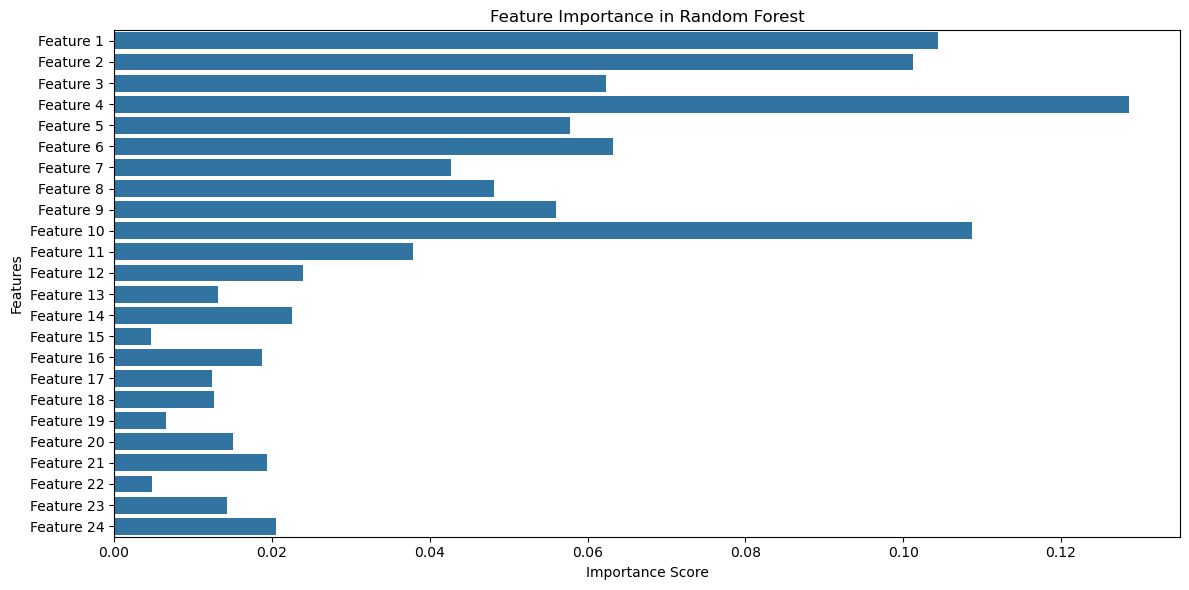

In [19]:

importances = model.feature_importances_
feature_names = [f"Feature {i+1}" for i in range(X.shape[1])]


plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()